# NYSE FANG+ Index 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'NYFANG'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-28 00:00:00-04:00,11089.129883,11102.400391,10819.250000,10922.860352,0,0.0,0.0
2024-08-29 00:00:00-04:00,10922.860352,11154.570312,10878.969727,10916.799805,0,0.0,0.0
2024-08-30 00:00:00-04:00,10916.799805,11101.480469,10916.799805,11094.629883,0,0.0,0.0
2024-09-03 00:00:00-04:00,11094.629883,11094.629883,10645.209961,10712.030273,0,0.0,0.0
2024-09-04 00:00:00-04:00,10712.030273,10846.070312,10617.700195,10736.750000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,13074.740234,13106.469727,0,0.0,0.0
2025-02-25 00:00:00-05:00,13106.469727,13106.469727,12706.450195,12901.769531,0,0.0,0.0
2025-02-26 00:00:00-05:00,12901.769531,13245.559570,12901.769531,13104.969727,0,0.0,0.0


In [2]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-28 00:00:00-05:00,5473.580078,5541.930176,5462.950195,5478.129883,0,0.0,0.0
2023-03-01 00:00:00-05:00,5478.129883,5498.299805,5404.950195,5411.080078,0,0.0,0.0
2023-03-02 00:00:00-05:00,5411.080078,5411.080078,5259.040039,5364.939941,0,0.0,0.0
2023-03-03 00:00:00-05:00,5364.939941,5535.899902,5364.939941,5528.939941,0,0.0,0.0
2023-03-06 00:00:00-05:00,5548.959961,5624.060059,5510.240234,5512.370117,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,13074.740234,13106.469727,0,0.0,0.0
2025-02-25 00:00:00-05:00,13106.469727,13106.469727,12706.450195,12901.769531,0,0.0,0.0
2025-02-26 00:00:00-05:00,12901.769531,13245.559570,12901.769531,13104.969727,0,0.0,0.0


## 日足チャートと Bollinger's bands

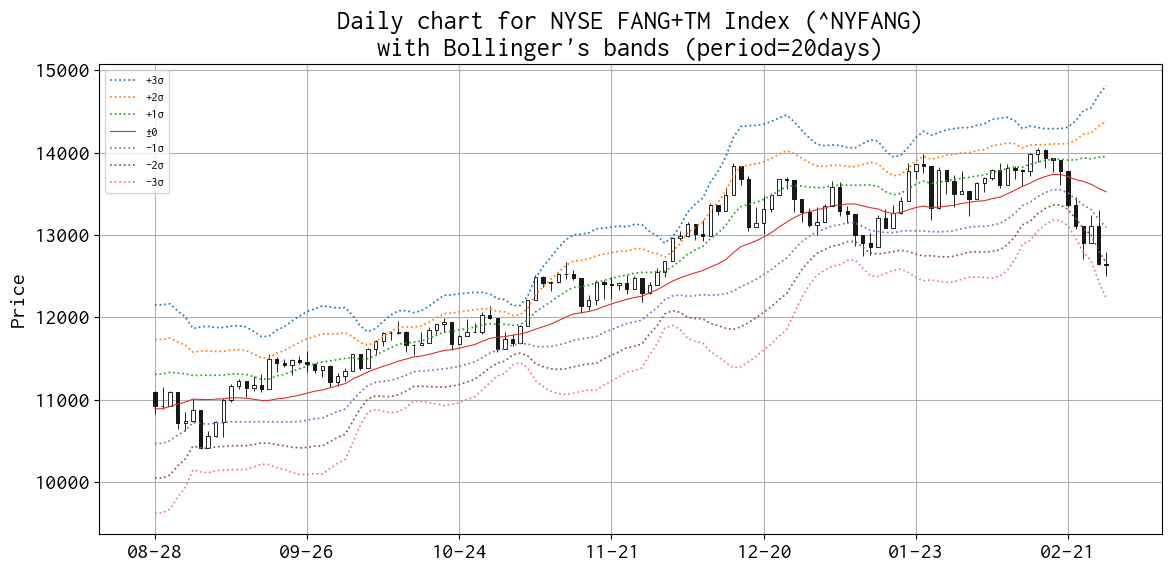

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.grid()

try:
    ax.set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [9]:
len(df)

125

In [10]:
df.tail(2)['Close']

Date
2025-02-26 00:00:00-05:00    13104.969727
2025-02-27 00:00:00-05:00    12649.284180
Name: Close, dtype: float64

In [11]:
df.tail(2)['Close'].diff()

Date
2025-02-26 00:00:00-05:00           NaN
2025-02-27 00:00:00-05:00   -455.685547
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(25).mean()

Date
2024-08-28 00:00:00-04:00             NaN
2024-08-29 00:00:00-04:00             NaN
2024-08-30 00:00:00-04:00             NaN
2024-09-03 00:00:00-04:00             NaN
2024-09-04 00:00:00-04:00             NaN
                                 ...     
2025-02-21 00:00:00-05:00    13664.753555
2025-02-24 00:00:00-05:00    13665.655156
2025-02-25 00:00:00-05:00    13650.986328
2025-02-26 00:00:00-05:00    13638.742734
2025-02-27 00:00:00-05:00    13593.389297
Name: Close, Length: 125, dtype: float64

In [13]:
df['Close'].rolling(75).mean()

Date
2024-08-28 00:00:00-04:00             NaN
2024-08-29 00:00:00-04:00             NaN
2024-08-30 00:00:00-04:00             NaN
2024-09-03 00:00:00-04:00             NaN
2024-09-04 00:00:00-04:00             NaN
                                 ...     
2025-02-21 00:00:00-05:00    13124.755885
2025-02-24 00:00:00-05:00    13142.985078
2025-02-25 00:00:00-05:00    13159.154401
2025-02-26 00:00:00-05:00    13175.266393
2025-02-27 00:00:00-05:00    13181.184583
Name: Close, Length: 125, dtype: float64

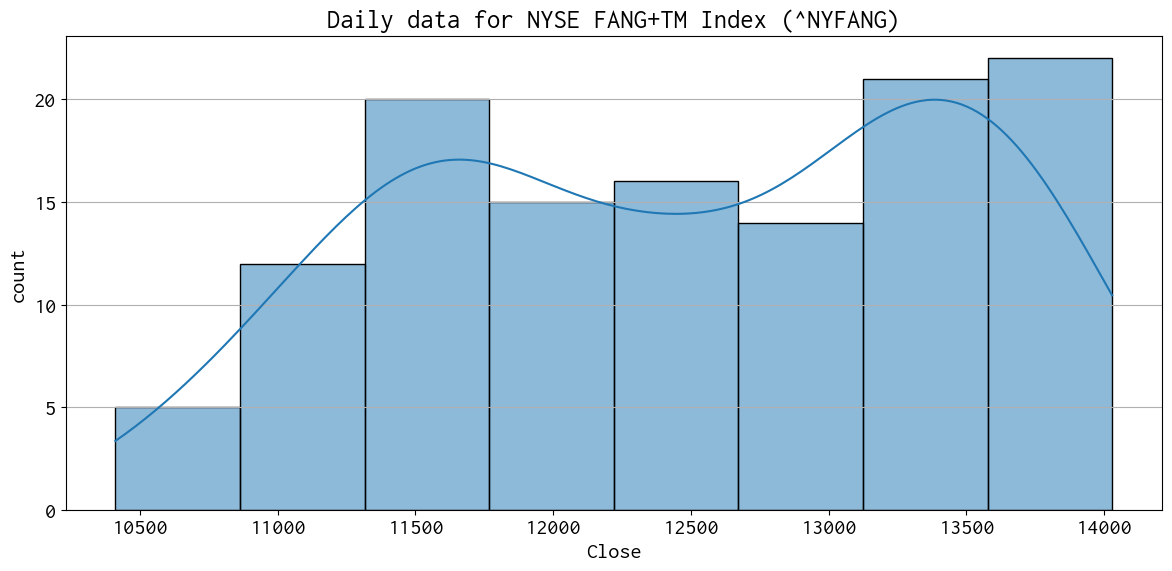

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

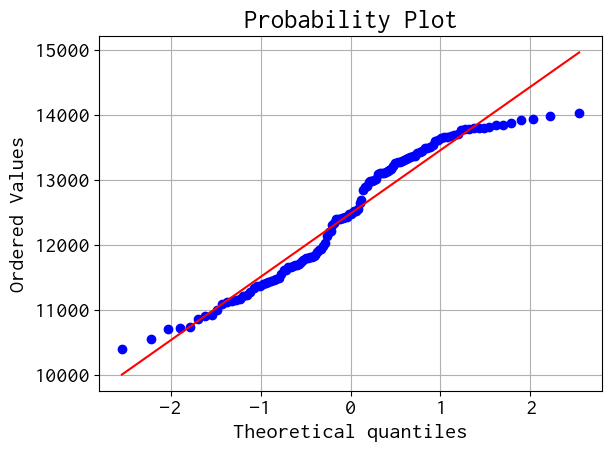

In [15]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

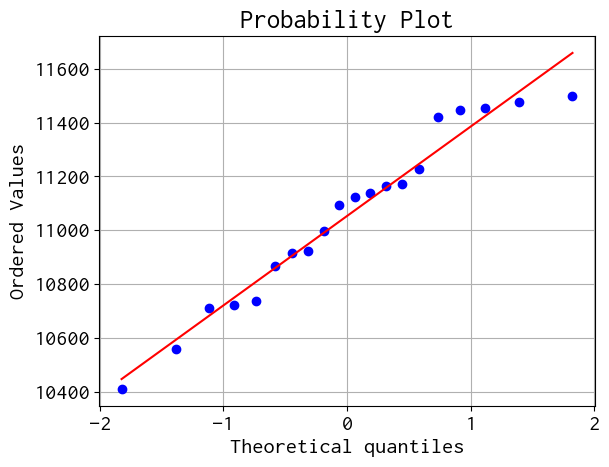

In [16]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)

plt.grid()
plt.show()

In [17]:
len(df)

125

In [18]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.945, p-value: 0.000


In [19]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.951, p-value: 0.387


In [20]:
res = stats.anderson(df['Close'])

In [21]:
print('%.3f' % res.statistic)

2.236


In [22]:
print(res.critical_values)

[0.559 0.637 0.764 0.891 1.06 ]


In [23]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [24]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [25]:
print('%.3f' % res.statistic)

0.313


In [26]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [27]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
